In [76]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('aggr.csv')
df['time'] = pd.to_datetime(df['time'])
# total = pd.read_csv('zone21aggregated.csv')
# total['time'] = pd.to_datetime(total['time'])
# total.index = total['time']
# total['value'].fillna(method="ffill")

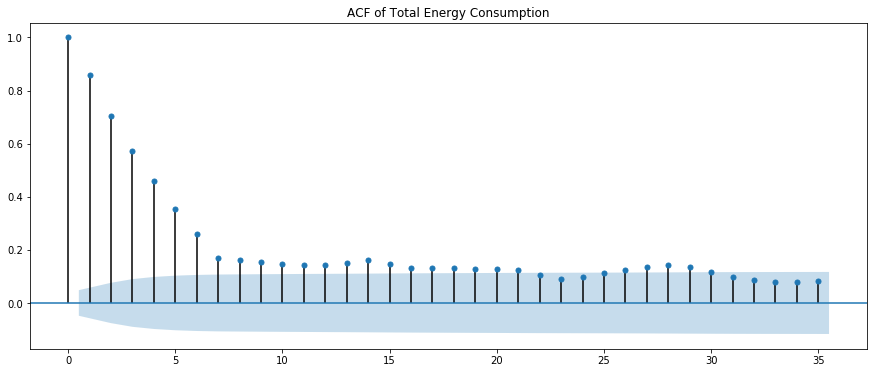

In [72]:
getAutocorrelationPlot(total)

,Unnamed: 0,time,zone_id,temperature,value
time,,,,,
2004-01-01 01:00:00,0,2004-01-01 01:00:00,1,46.0,16853.0
2004-01-01 02:00:00,1,2004-01-01 02:00:00,1,46.0,16450.0
2004-01-01 03:00:00,2,2004-01-01 03:00:00,1,45.0,16517.0
2004-01-01 04:00:00,3,2004-01-01 04:00:00,1,41.0,16873.0
2004-01-01 05:00:00,4,2004-01-01 05:00:00,1,39.0,17064.0
...,...,...,...,...,...
2008-07-07 20:00:00,791995,2008-07-07 20:00:00,20,NaN,NaN
2008-07-07 21:00:00,791996,2008-07-07 21:00:00,20,NaN,NaN
2008-07-07 22:00:00,791997,2008-07-07 22:00:00,20,NaN,NaN


In [29]:
def getstr(x):
    return x.get_string()
df['hour'] = df['time'].apply(lambda x:x.strftime("%HH"))
df['month'] = df['time'].apply(lambda x: x.strftime('%m'))

In [84]:
def getAutocorrelationPlot(df, zid, lags=50, name = 'temperature'):
    # from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    data = df[df['zone_id']==zid]
    lags = [1,24,48,96,168, 720, 744, 8760]
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 6))
    df = data.resample(on='time', rule='D').mean()
    title = f'Temperature ACF of Zone {zid} (Day)'
    plot_acf(df[name].fillna(method="ffill"), lags=100, ax=ax, title=title)
    plt.savefig(f'result/weather/acf_day_{zid}')
    plt.show()

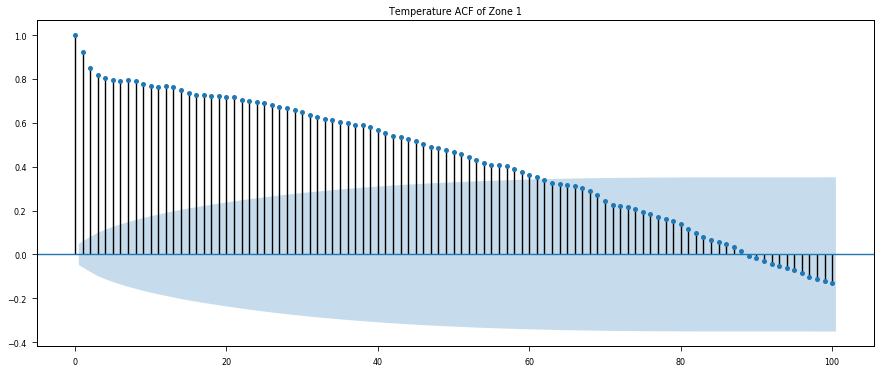

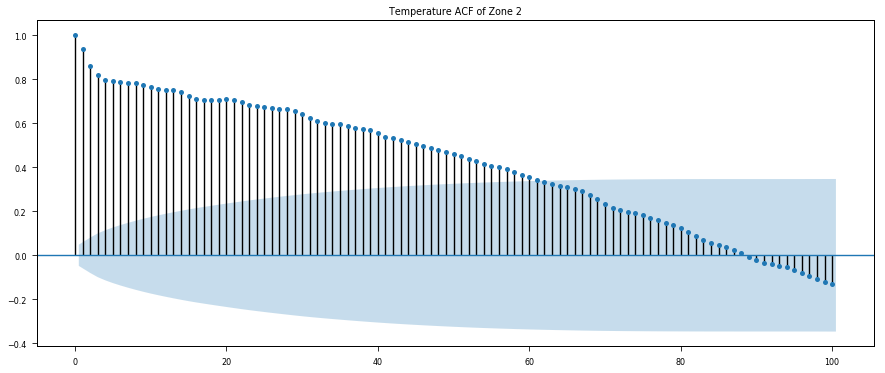

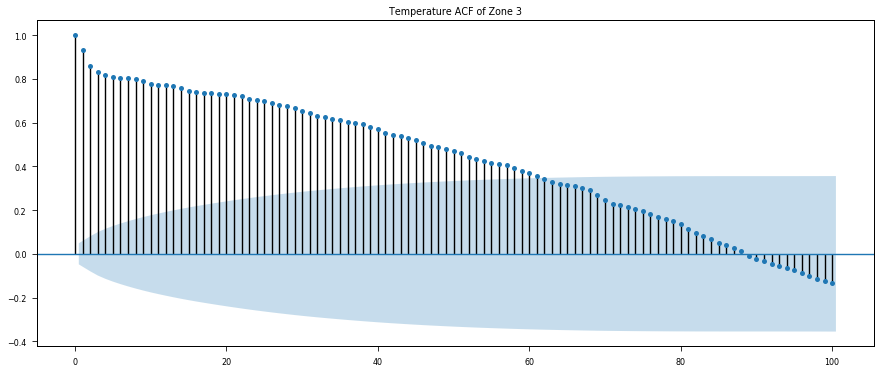

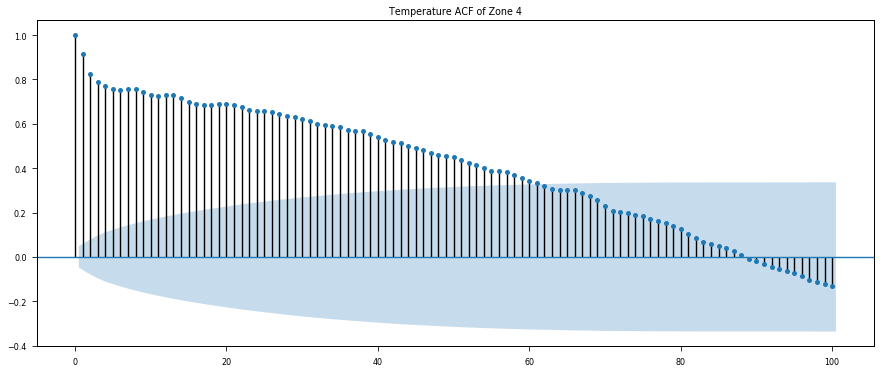

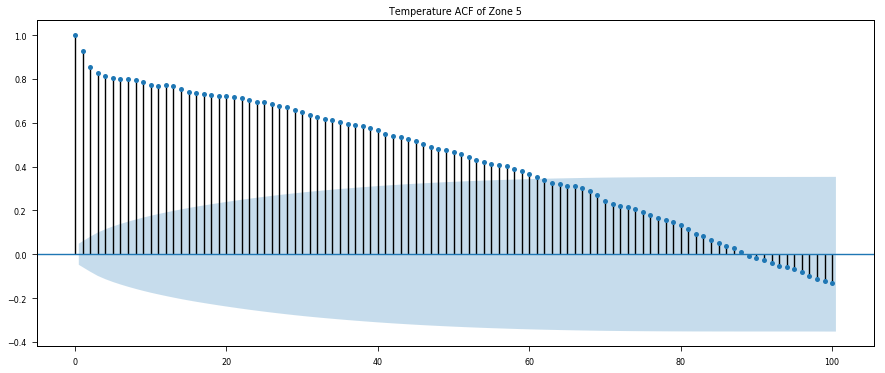

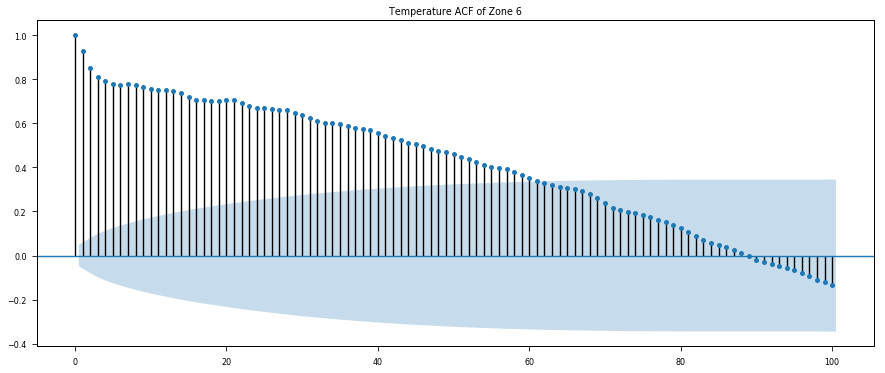

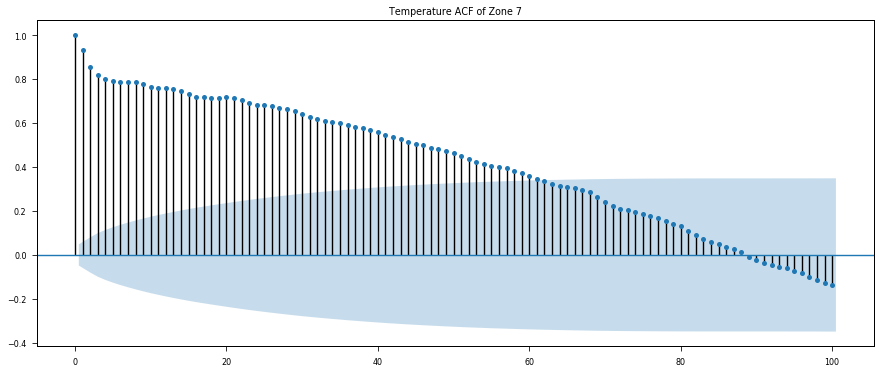

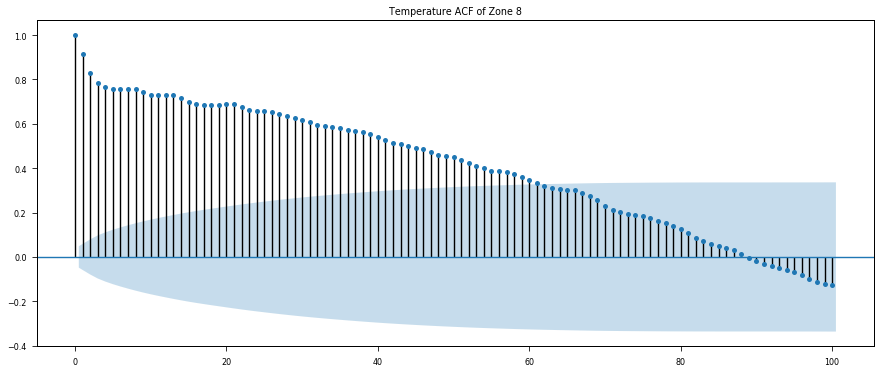

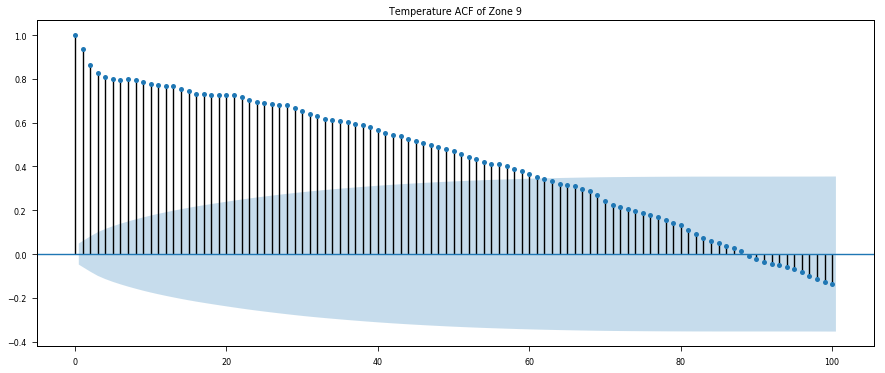

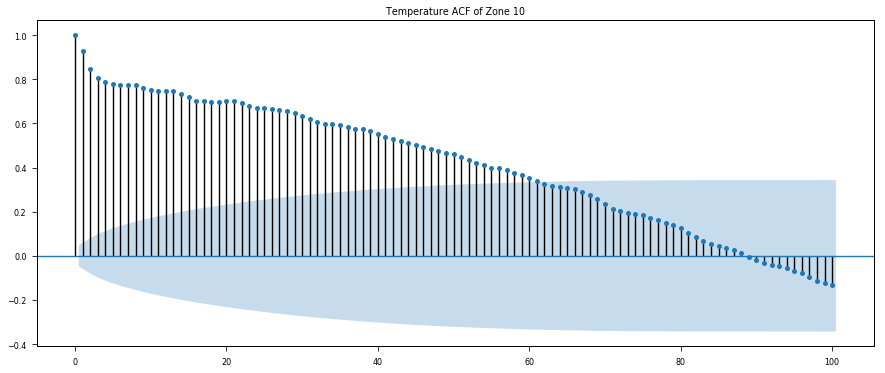

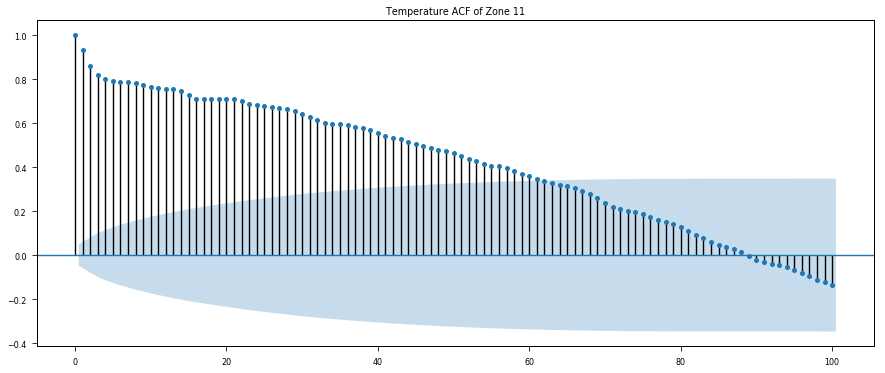

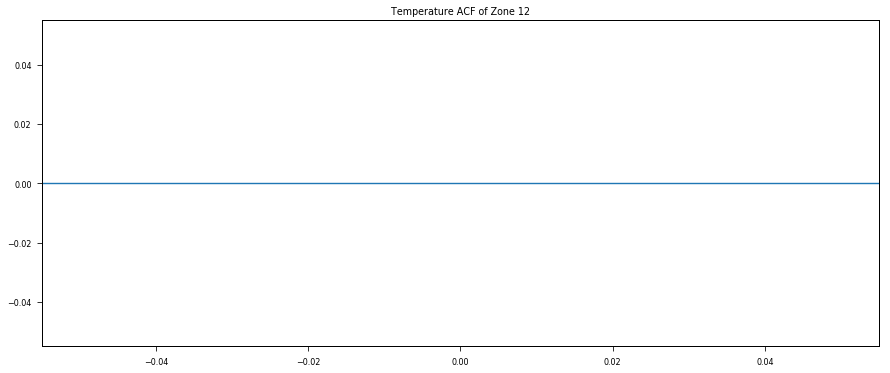

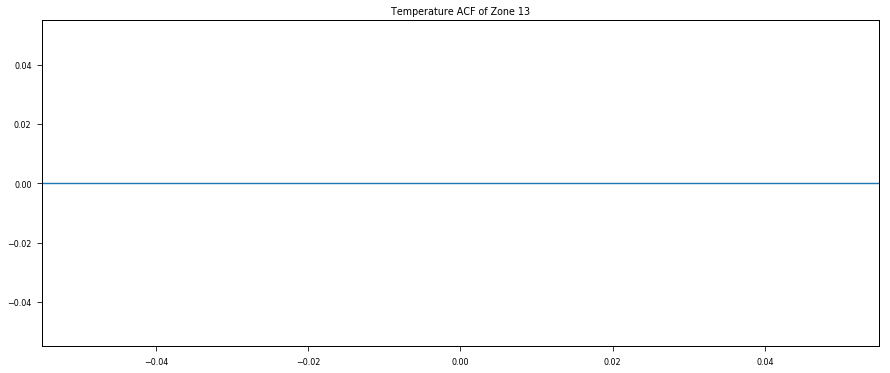

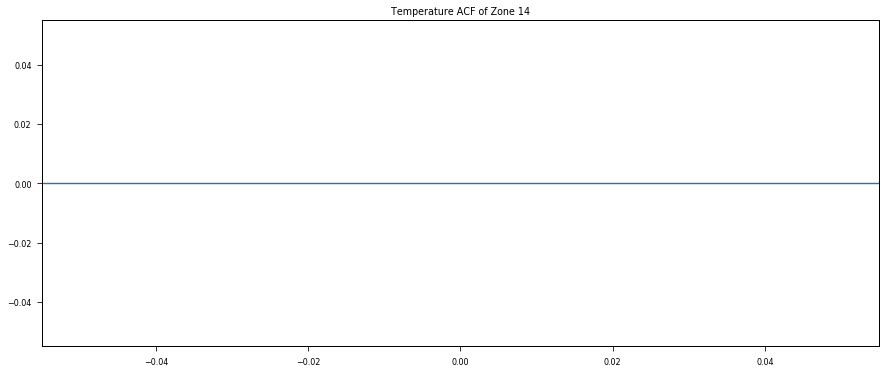

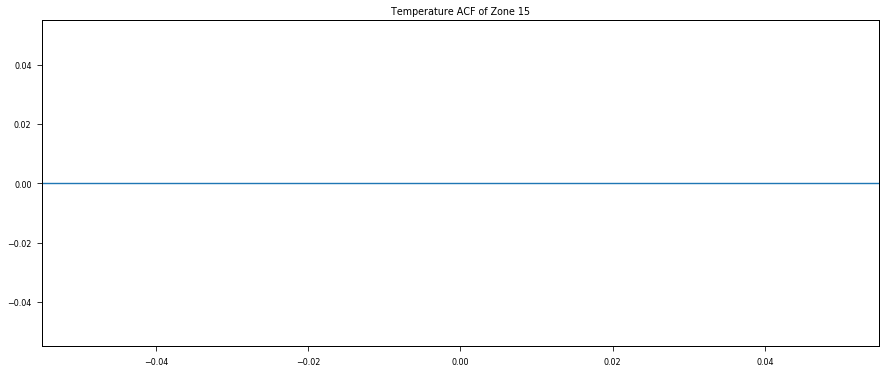

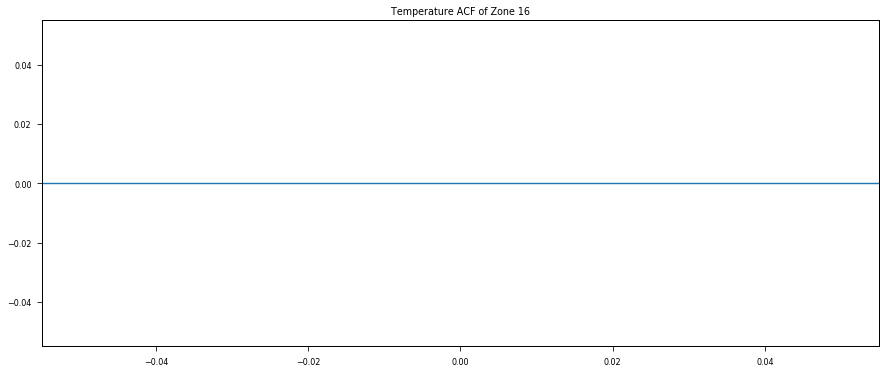

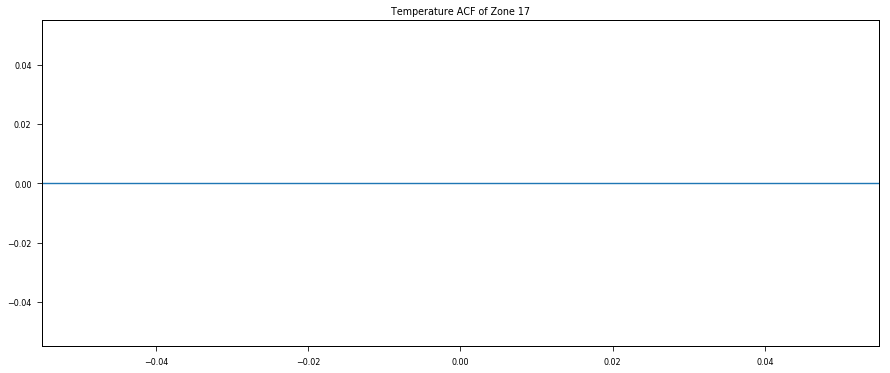

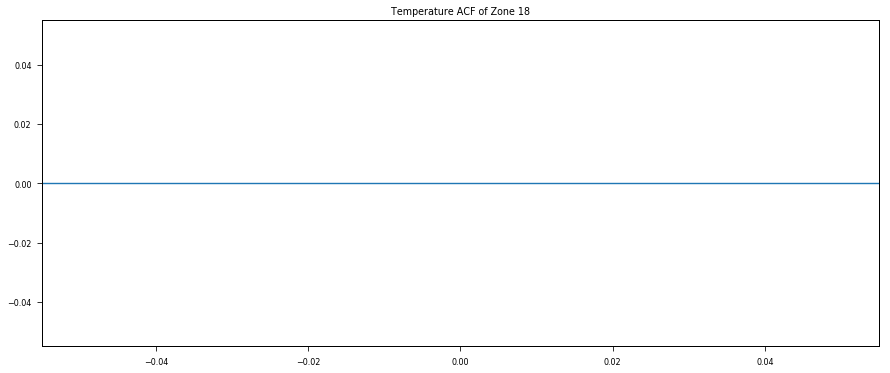

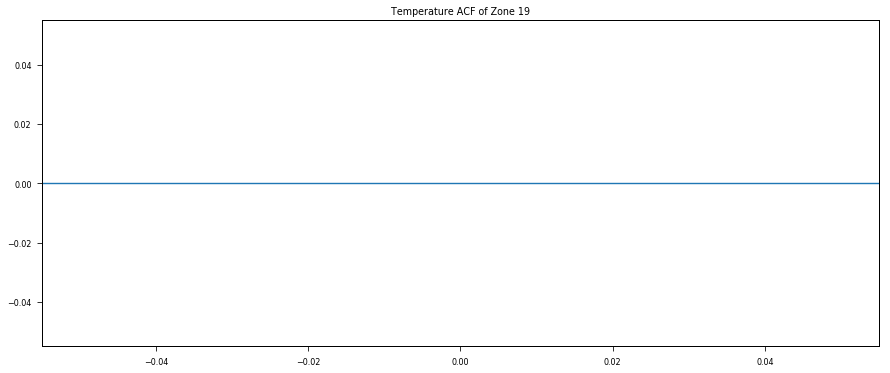

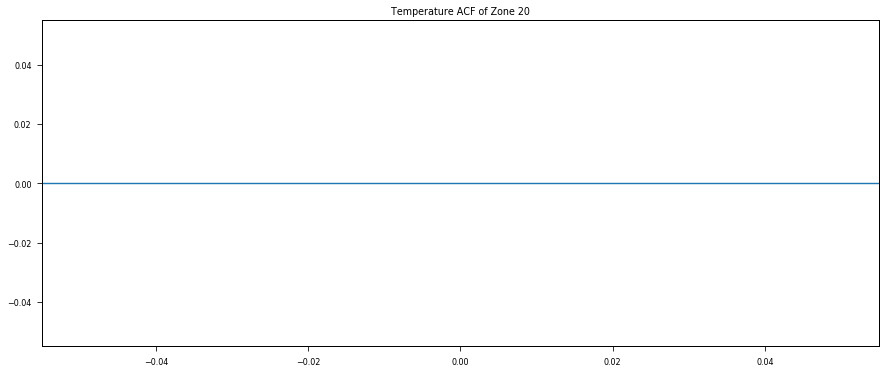

In [85]:
for zid in range(1, 21):
    getAutocorrelationPlot(df, zid)

In [41]:
def getBoxPlot(data):
    plt.close()
    fig, ax = plt.subplots(figsize=(15, 8))
    g = sns.boxplot(x='zone_id', y='value', data=data, ax=ax)
#     g.legend_.remove()
    plt.show()

In [57]:
def getLinePlot(data):
    plt.close()
    fig, ax = plt.subplots(figsize=(80, 8))
    g = sns.lineplot(x='time', y="value", data=data)
    plt.show()

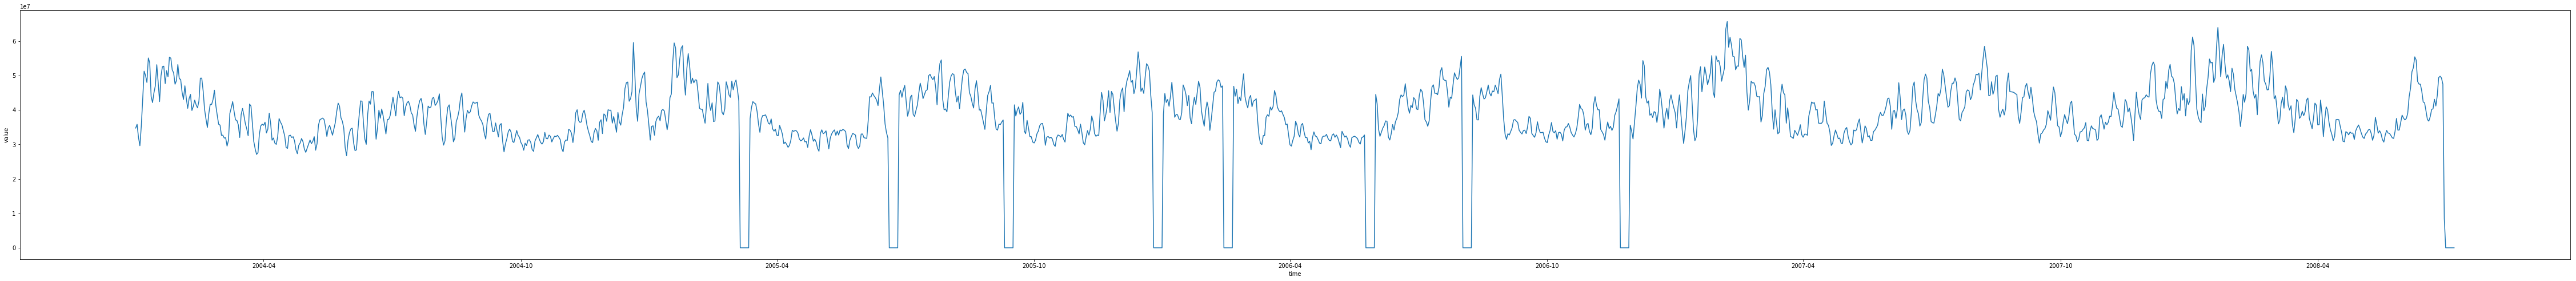

In [58]:
tmp = total.resample('D').sum()
tmp['time'] = tmp.index
tmp
getLinePlot(tmp)

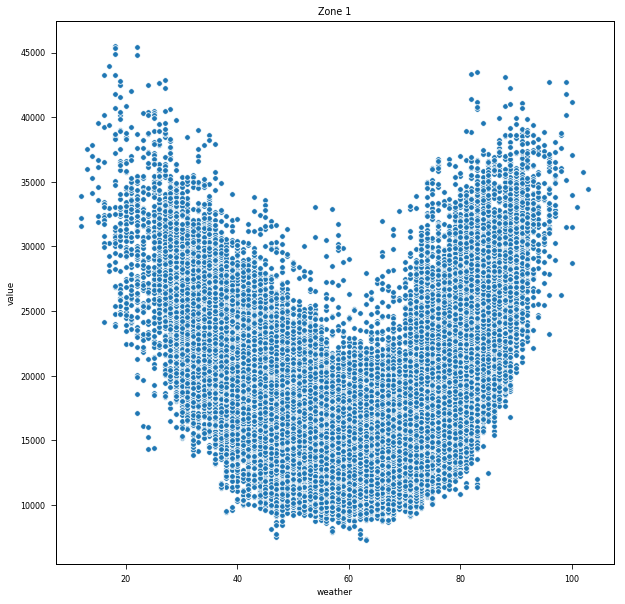

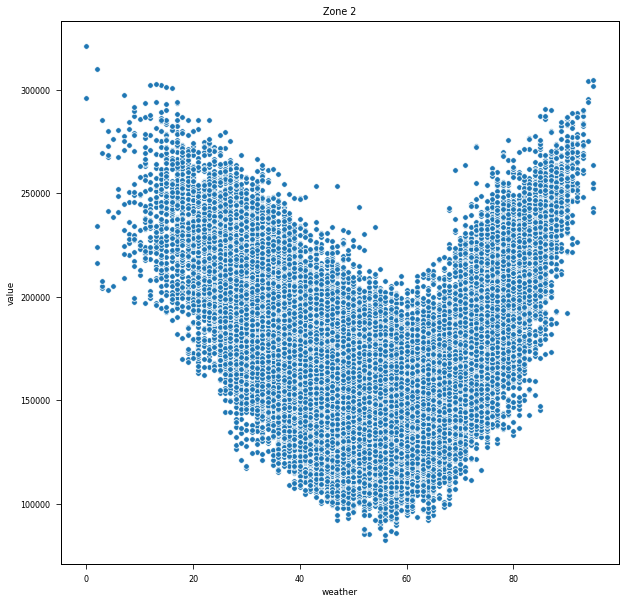

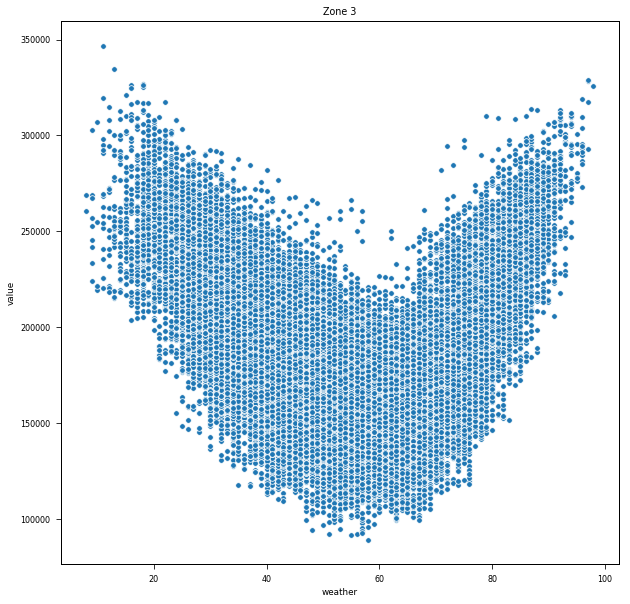

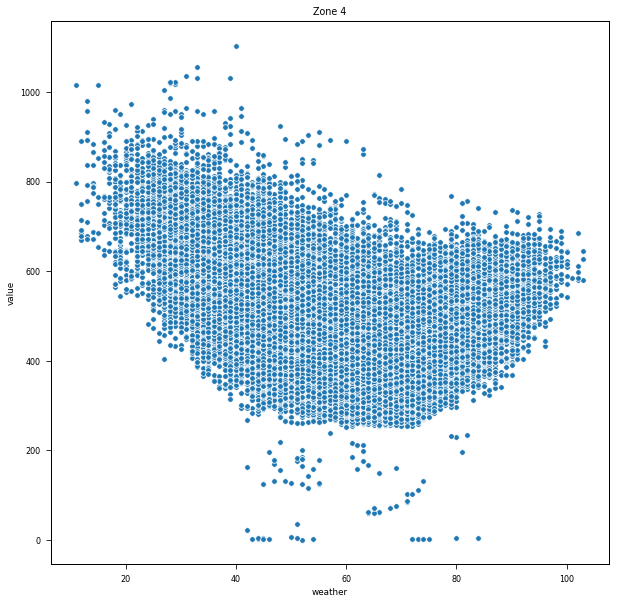

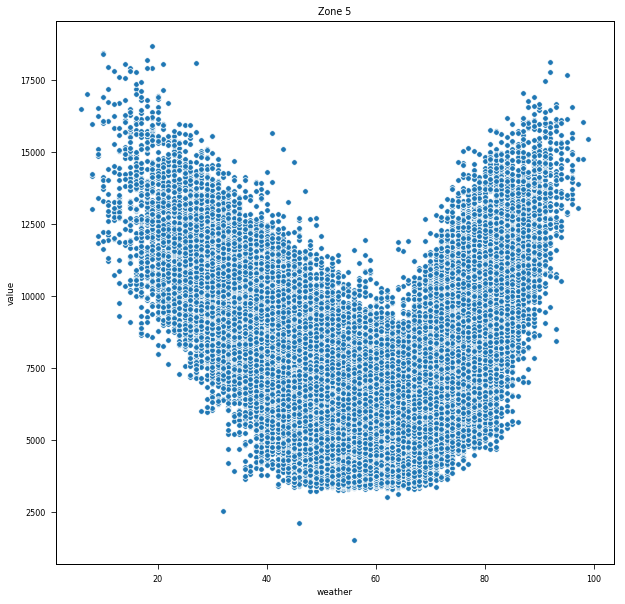

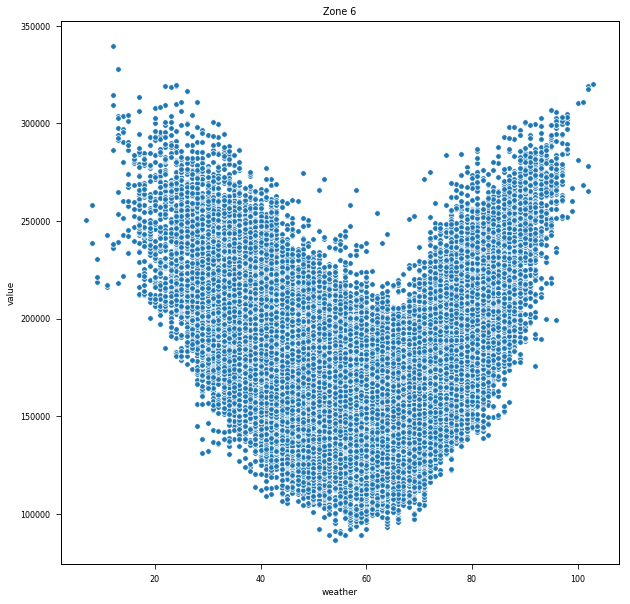

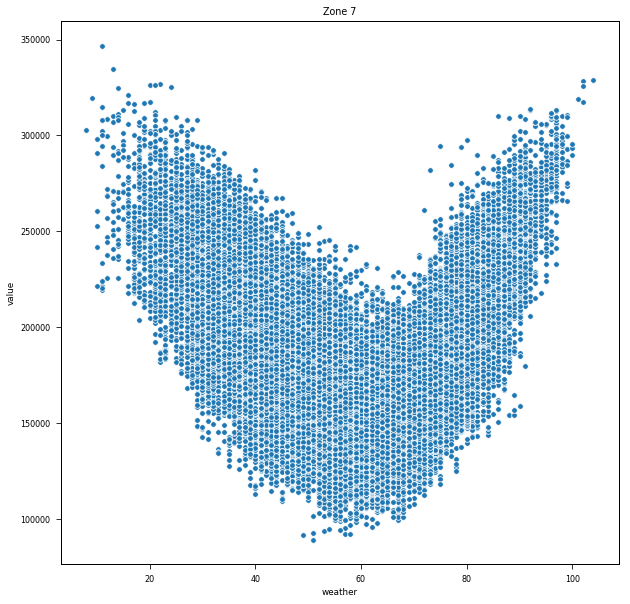

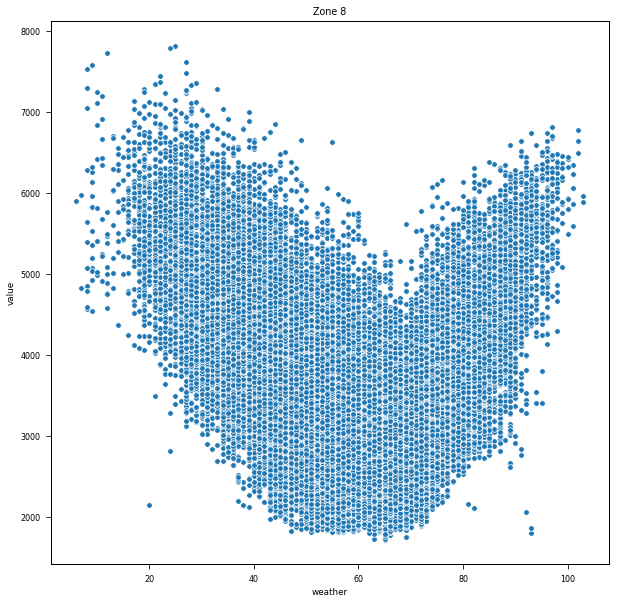

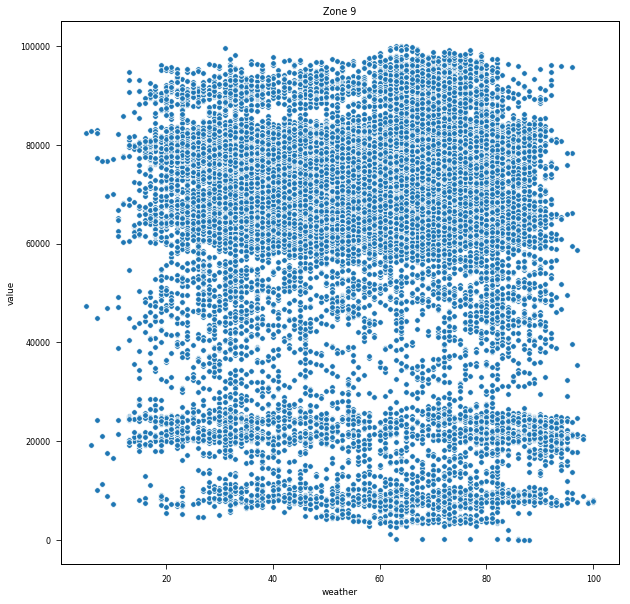

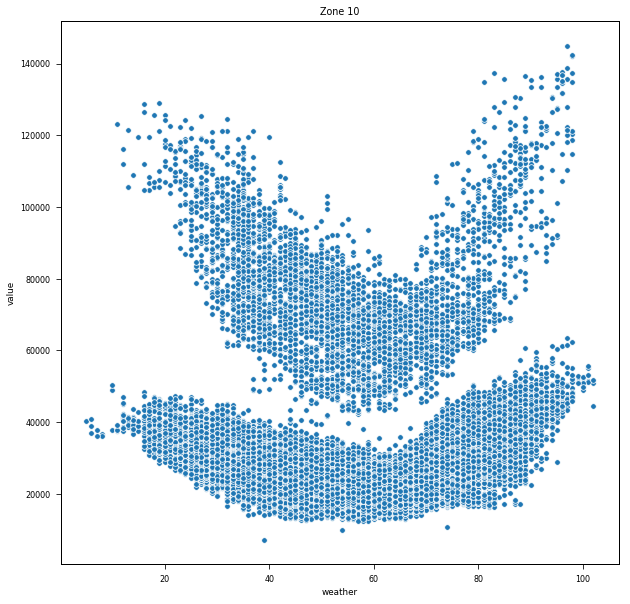

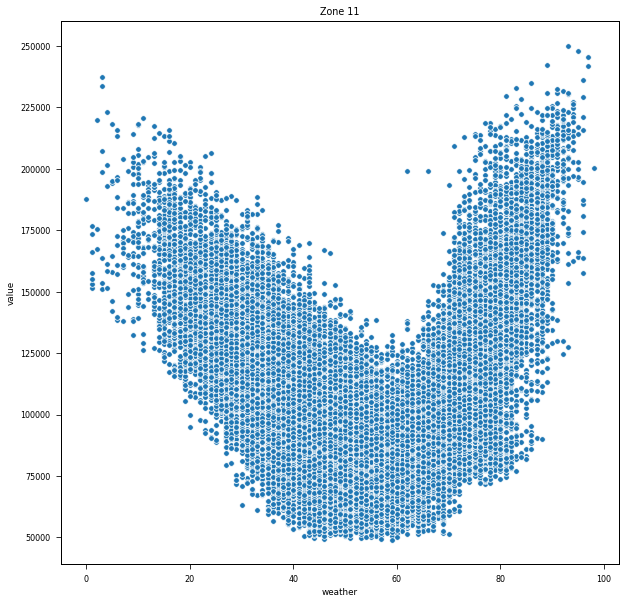

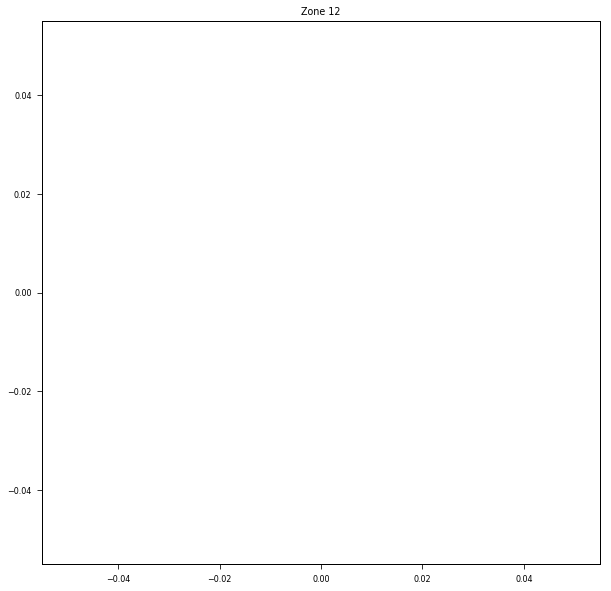

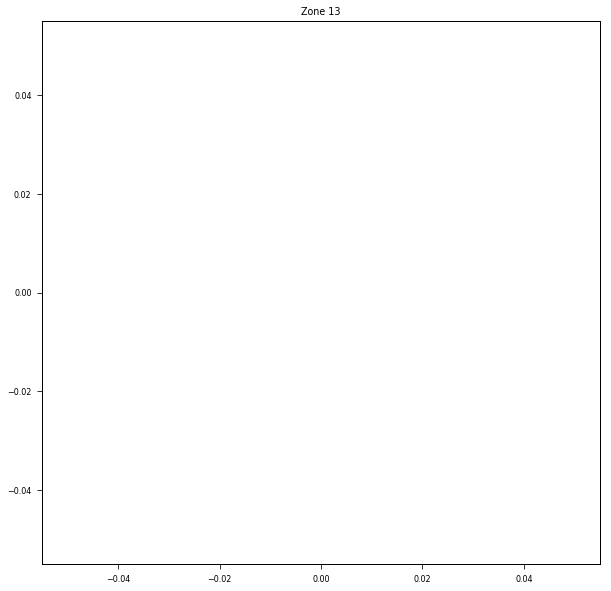

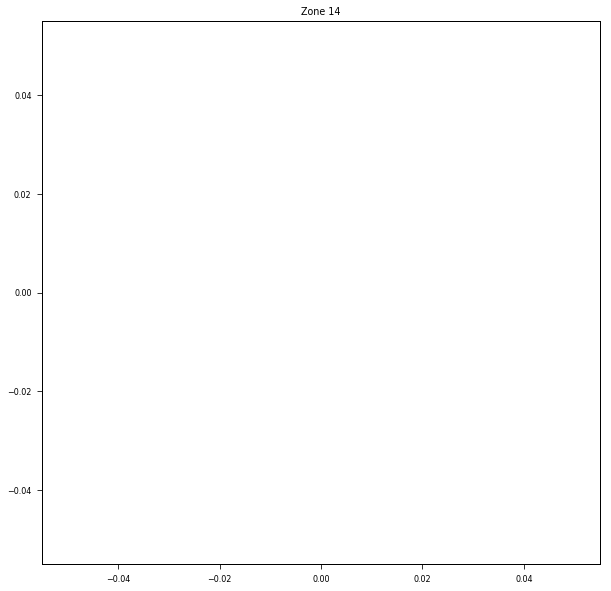

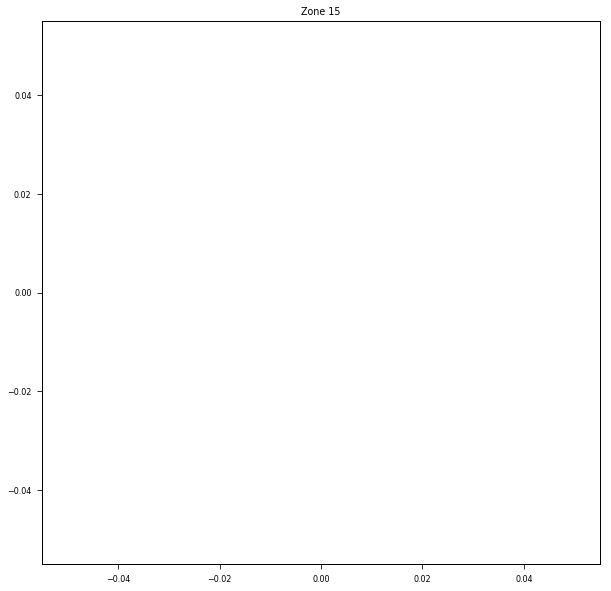

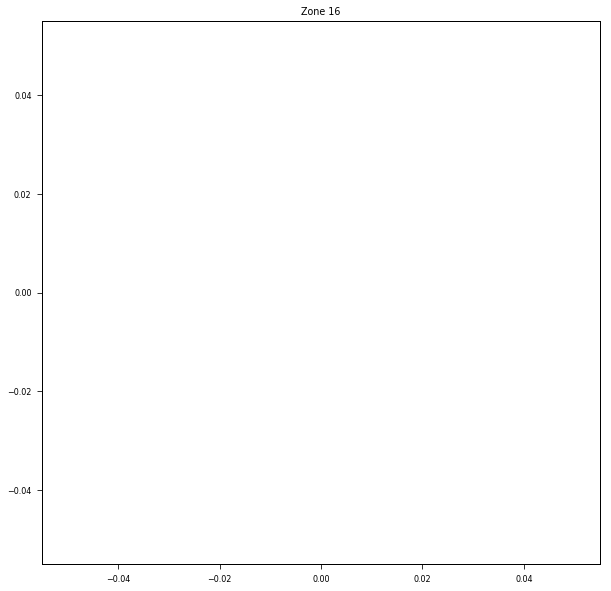

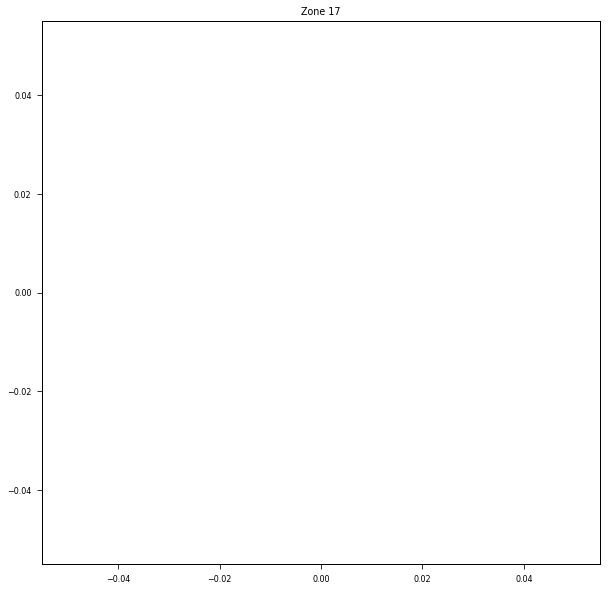

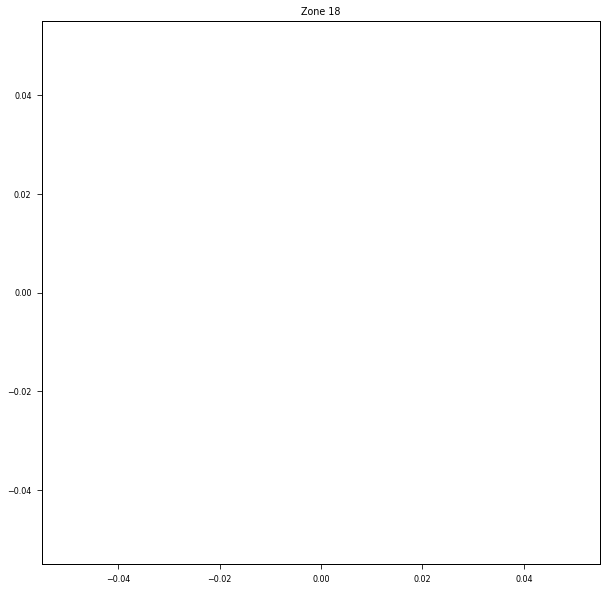

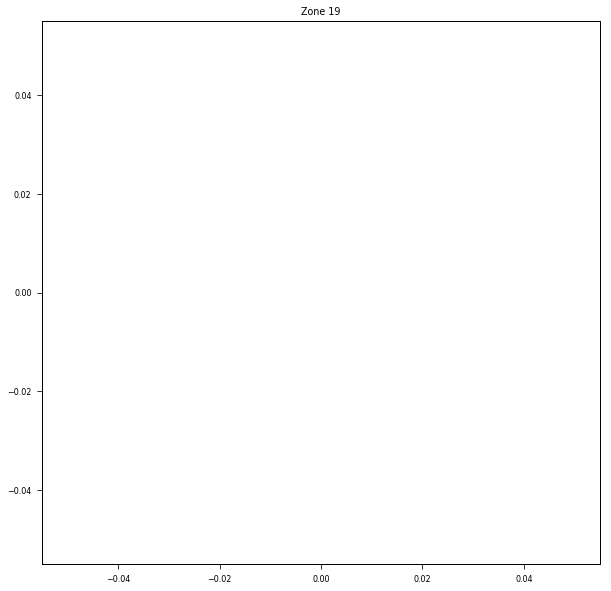

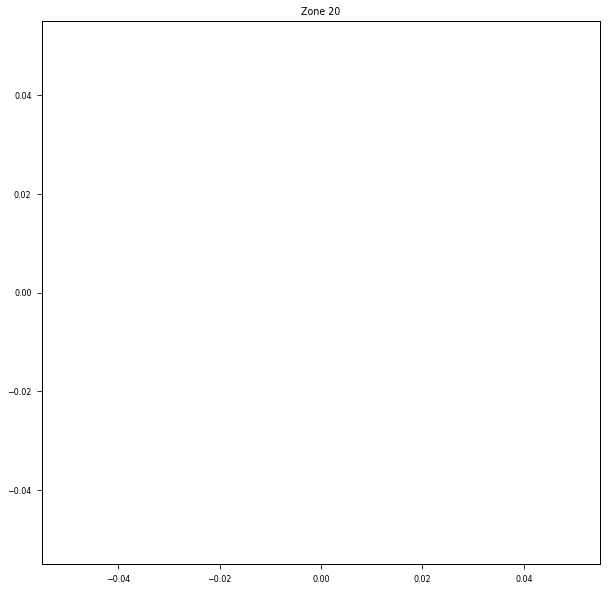

In [73]:
def getSingleCorrelation(d, idx):
    plt.close()
    data = d[d['zone_id']==idx]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Zone {idx}')
    g = sns.scatterplot(x = 'weather', y = 'value', data=data, ax=ax)
    plt.savefig(f'result/weather/weather_zone_{idx}.png')
    plt.show()
for i in range(1, 21):
    getSingleCorrelation(weather, i)

In [75]:
weather[weather['zone_id']==17]

,value,time,zone_id,weather
633600,30645.0,2004-01-01 00:00:00,17,NaN
633601,30461.0,2004-01-01 01:00:00,17,NaN
633602,30197.0,2004-01-01 02:00:00,17,NaN
633603,30264.0,2004-01-01 03:00:00,17,NaN
633604,30907.0,2004-01-01 04:00:00,17,NaN
...,...,...,...,...
673195,NaN,2008-07-07 19:00:00,17,NaN
673196,NaN,2008-07-07 20:00:00,17,NaN
673197,NaN,2008-07-07 21:00:00,17,NaN
673198,NaN,2008-07-07 22:00:00,17,NaN


In [60]:
weather

,value,time,zone_id,weather
0,16853.0,2004-01-01 00:00:00,1,46.0
1,16450.0,2004-01-01 01:00:00,1,46.0
2,16517.0,2004-01-01 02:00:00,1,45.0
3,16873.0,2004-01-01 03:00:00,1,41.0
4,17064.0,2004-01-01 04:00:00,1,39.0
...,...,...,...,...
791995,NaN,2008-07-07 19:00:00,20,NaN
791996,NaN,2008-07-07 20:00:00,20,NaN
791997,NaN,2008-07-07 21:00:00,20,NaN
791998,NaN,2008-07-07 22:00:00,20,NaN
